In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
from nips2018.movie import data, parameters, models, oracle
from nips2018.movie.analysis import performance
import pandas as pd
import seaborn as sns
import numpy as np
import datajoint as dj
import matplotlib.pyplot as plt
from config import movie_vs_noise_cmap, fix_axis, scan_order, scan_cmap, performance_yticks, performance_ylim, strike



def test_label(row):
    h = row.test_data_hash
    if h == '5253599d3dceed531841271d6eeba9c5':
        return  'movies'
    elif h  == '6c0290da908317e55c4baf92e379d651':
        return 'noise'
    
def readout_train(row):
    h = row.data_hash
    if h in ('a4ecafc831670c7744ffe22320df77b7', 'b768df67f772d4b92fa6970265d6a1dd'):
        if row.preproc_id == 1:
            return 'movies'
        elif row.preproc_id == 2:
            return 'noise'
        elif row.preproc_id == 3:
            return 'both'
    elif h in ('76a76dbc0216d8b10a079957ea24e3ad','92ed0adb09662102f8358043316aa2de'):
        if row.preproc_id == 1:
            return 'noise'
        elif row.preproc_id == 2:
            return 'movies'
        elif row.preproc_id == 3:
            return 'both'
    else:
        raise ValueError('Wrong hash')

def core_train(row):
    h = row.data_hash
    if h in ('a4ecafc831670c7744ffe22320df77b7', 'b768df67f772d4b92fa6970265d6a1dd'):
        return 'movies'
    elif h in ('76a76dbc0216d8b10a079957ea24e3ad','92ed0adb09662102f8358043316aa2de'):
        return 'noise'
    else:
        raise ValueError('Wrong hash')

sns.set_context('paper', rc={'dpi':150}, font_scale=1.3)

[autoreload of nips2018.movie.data failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 390, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 329, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 287, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 329, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 287, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensi

# Base Performance

In [4]:
parameters.DataConfig.AreaLayerSplitRawSizeMatched()

data_hash unique identifier for configuration,stats_source normalization source,train_seq_len training sequence length in frames,permute cyclical shift of the datatypes among groups,stimulus_types stimulus source type for the different groups,layer short name for cortical area,brain_area area name,balanced whether sampling is balanced or not
92ed0adb09662102f8358043316aa2de,all,150,0,"~stimulus.Clip,stimulus.Clip,stimulus.Clip|~stimulus.Clip",L2/3,V1,1
b768df67f772d4b92fa6970265d6a1dd,all,150,0,"stimulus.Clip,~stimulus.Clip,stimulus.Clip|~stimulus.Clip",L2/3,V1,1


In [5]:
base = {
         'mod_hash': '4954311aa3bebb347ebf411ab5198890',
         'seed': 2606,
         'shift_hash': '64add03e1462b7413b59812d446aee9f',
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        }
group_ids = [21,22,23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))
network_config = dj.AndList([
    group_constr, 
    base,
#     'core_hash in ("7cb8163e1098433a5faca879ef93baed")'
    'core_hash in ("22d11147b37e3947e7d1034cc00d402c", "7cb8163e1098433a5faca879ef93baed")'
])


In [6]:
models.Encoder.TestScores() & network_config

group_id index of group,core_hash unique identifier for configuration,ro_hash unique identifier for configuration,shift_hash unique identifier for configuration,mod_hash unique identifier for configuration,data_hash unique identifier for configuration,train_hash unique identifier for configuration,seed random seed,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,neurons number of neurons,pearson test correlation on single trial responses
21,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.146829
21,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,6c0290da908317e55c4baf92e379d651,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.154925
21,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.116284
21,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,6c0290da908317e55c4baf92e379d651,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.066295
22,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.121464
22,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,6c0290da908317e55c4baf92e379d651,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.145478
22,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.0912722


In [7]:
rel = models.Encoder.UnitTestScores() & network_config
df = pd.DataFrame(rel.fetch())
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]
df['train/test data'] = ['movies' if r.data_hash == '5253599d3dceed531841271d6eeba9c5' else 'noise' for _, r in df.iterrows()]
df['model'] = ['full' if r.core_hash == '22d11147b37e3947e7d1034cc00d402c' else 'linear-nonlinear' for _, r in df.iterrows()]
df = df.drop([e for e in df.columns if 'hash' in e], axis=1)
df[:10]

,group_id,seed,animal_id,session,scan_idx,preproc_id,unit_id,pearson,scan,train/test data,model
0,21,2606,17797,8,5,1,95,0.148536,17797-8-5,movies,full
1,21,2606,17797,8,5,1,96,0.184587,17797-8-5,movies,full
2,21,2606,17797,8,5,1,97,0.075648,17797-8-5,movies,full
3,21,2606,17797,8,5,1,98,0.121994,17797-8-5,movies,full
4,21,2606,17797,8,5,1,99,0.056254,17797-8-5,movies,full
5,21,2606,17797,8,5,1,119,0.161351,17797-8-5,movies,full
6,21,2606,17797,8,5,1,120,0.182583,17797-8-5,movies,full
7,21,2606,17797,8,5,1,121,0.222208,17797-8-5,movies,full
8,21,2606,17797,8,5,1,122,0.098997,17797-8-5,movies,full
9,21,2606,17797,8,5,1,123,0.022343,17797-8-5,movies,full


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


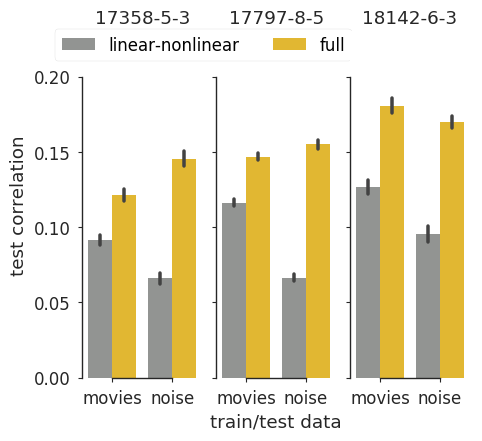

In [8]:
sns.set_context('paper', font_scale=1.5)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    g = sns.factorplot("train/test data", "pearson", hue='model', col='scan',
                       order=["movies", "noise"], col_order=scan_order,  
                       hue_order=['linear-nonlinear', 'full'], data=df, kind="bar", legend=False)
g.fig.set_dpi(100)
g.axes[0,0].set_yticks(performance_yticks)
g.axes[0,0].set_ylim(performance_ylim)
# g.add_legend()
g.axes[0,1].legend(loc='upper right', ncol=2, bbox_to_anchor=(1.2, 1.03))
g.set_ylabels('test correlation')
g.set_titles('{col_name}')
[fix_axis(a) for a in g.axes.ravel()]
sns.despine(trim=True)
g.fig.set_size_inches((5,5))
g.axes[0,0].set_xlabel("")
g.axes[0,-1].set_xlabel("")
g.fig.subplots_adjust(left=.2)

g.fig.savefig('figures/performance_by_source2.png', dpi=100)


# Network Components

In [9]:
group_ids = [21,22,23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))
network_configs = dj.AndList([
    {'core_hash': '22d11147b37e3947e7d1034cc00d402c', # 12 x 36
     'seed': 2606,
     'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
     'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
    },
    'mod_hash in ("4954311aa3bebb347ebf411ab5198890", "bafd7322c6e97d25b6299b5d6fe8920b")',
    'shift_hash in ("64add03e1462b7413b59812d446aee9f", "bafd7322c6e97d25b6299b5d6fe8920b")',
    'data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    'test_data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    group_constr
])


In [10]:
performance.XPearson().populate(network_configs)

In [11]:
tmp = pd.DataFrame((performance.XPearson() & network_configs).fetch())
tmp['shifter'] = ['shifter' if r.shift_hash == '64add03e1462b7413b59812d446aee9f' else 'no shifter' for _, r in tmp.iterrows()]
tmp['modulator'] = ['modulator' if r.mod_hash == '4954311aa3bebb347ebf411ab5198890' else 'no modulator' for _, r in tmp.iterrows()]
tmp['train data'] = ['movies' if r.data_hash == '5253599d3dceed531841271d6eeba9c5' else 'noise' for _, r in tmp.iterrows()]
tmp['test data'] = ['movies' if r.test_data_hash == '5253599d3dceed531841271d6eeba9c5' else 'noise' for _, r in tmp.iterrows()]
tmp.drop([e for e in tmp.columns if 'hash' in e], axis=1)

,group_id,seed,shifter,modulator,train data,test data
0,21,2606,shifter,modulator,movies,movies
1,21,2606,shifter,no modulator,movies,movies
2,21,2606,no shifter,modulator,movies,movies
3,21,2606,no shifter,no modulator,movies,movies
4,22,2606,shifter,modulator,movies,movies
5,22,2606,shifter,no modulator,movies,movies
6,22,2606,no shifter,modulator,movies,movies
7,22,2606,no shifter,no modulator,movies,movies
8,23,2606,shifter,modulator,movies,movies
9,23,2606,shifter,no modulator,movies,movies


In [12]:
df = pd.DataFrame((performance.XPearson.UnitScores() & network_configs).fetch())

In [13]:
df['shifter'] = ['shift' if r.shift_hash == '64add03e1462b7413b59812d446aee9f' else strike('shift') for _, r in df.iterrows()]
df['modulator'] = ['mod' if r.mod_hash == '4954311aa3bebb347ebf411ab5198890' else strike('mod') for _, r in df.iterrows()]
df['train data'] = ['movies' if r.data_hash == '5253599d3dceed531841271d6eeba9c5' else 'noise' for _, r in df.iterrows()]
df['test data'] = ['movies' if r.test_data_hash == '5253599d3dceed531841271d6eeba9c5' else 'noise' for _, r in df.iterrows()]
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


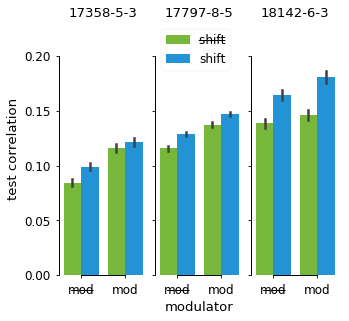

In [14]:
sns.set_context('paper', font_scale=1.5)

sns.set_palette(['#76cd26','#069af3'], 2)
g = sns.factorplot("modulator", "pearson", hue='shifter', col='scan', col_order=scan_order, data=df, 
                       kind='bar', hue_order=[strike('shift'), 'shift'], order=[strike('mod'), 'mod'], legend=False)
g.set_titles('{col_name}')
g.set_ylabels('test correlation')
g.axes[0,0].set_ylim(performance_ylim)
g.axes[0,0].set_yticks(performance_yticks)

g.axes[0,1].legend(loc='upper left', ncol=1)

[fix_axis(a) for a in g.axes.ravel()]
g.fig.set_size_inches((5,5))
sns.despine(trim=True)
g.axes[0,0].set_xlabel("")
g.axes[0,-1].set_xlabel("")
g.fig.subplots_adjust(left=.2)
g.fig.savefig('figures/performance_by_component.png', dpi=100)


# Oracle

In [15]:
group_ids = [21, 22, 23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))

network_config = dj.AndList([
    {    'core_hash': '22d11147b37e3947e7d1034cc00d402c', # 12 x 36
         'seed': 2606,
         'mod_hash': '4954311aa3bebb347ebf411ab5198890',
         'shift_hash': '64add03e1462b7413b59812d446aee9f',
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        },
    'data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    group_constr
])
    


In [16]:
models.Encoder.TestScores() & network_config

group_id index of group,core_hash unique identifier for configuration,ro_hash unique identifier for configuration,shift_hash unique identifier for configuration,mod_hash unique identifier for configuration,data_hash unique identifier for configuration,train_hash unique identifier for configuration,seed random seed,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,neurons number of neurons,pearson test correlation on single trial responses
21,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.146829
22,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.121464
23,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,18142,6,3,1,1344,0.180641


In [17]:
df_oracle = pd.DataFrame( (oracle.MovieOracle.TotalUnitScores() & 'data_hash in ("5253599d3dceed531841271d6eeba9c5")' & group_constr).fetch())
df_network = pd.DataFrame( (models.Encoder.UnitTestScores() & network_config).fetch())
df = df_network.merge(df_oracle, on=['group_id', 'data_hash', 'animal_id', 'session', 'scan_idx', 'preproc_id', 'unit_id'], suffixes=("", "_oracle")).drop([e for e in df_network.columns if 'hash' in e], axis=1)
df['session'] = list(map(str, df['session']))
df['animal_id'] = list(map(str, df['animal_id']))
df['scan_idx'] = list(map(str, df['scan_idx']))
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


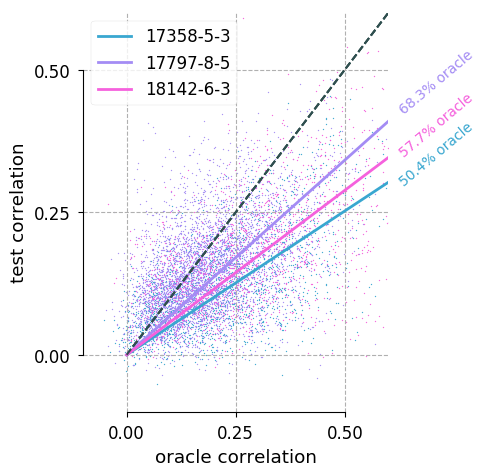

In [18]:
sns.set_context('paper', font_scale=1.5)
sns.set_palette(scan_cmap)
def oracle_regression(x, y, **kwargs):
    x = np.array(x)[:, None]
    y = np.array(y)
    a, _, _, _ = np.linalg.lstsq(x, y)
    ax = plt.gca()
    label = kwargs.pop('label')
    ax.scatter(x, y, **kwargs)
    
    ax.plot([0,.6],[0,a*.6], '-', color=kwargs['color'], lw=2, label= label)
    ax.plot([0,.6],[0,.6], '--', color='darkslategray')
    ax.text(.62, .7 * a, '{:.1f}% oracle'.format(a.item() *100), fontsize=10, va='center', color=kwargs['color'], rotation=40)
    ax.set_xlim([-.1, .6])
    ax.set_ylim([-.1, .6])
    ax.set_xticks([0, .25, .5])
    ax.set_yticks([0, .25, .5])
    ax.grid(True, zorder=-10, linestyle='--')
g = sns.FacetGrid(df, hue='scan', hue_order=scan_order)
g.map(oracle_regression, 'pearson_oracle', 'pearson', s=.5)

g.fig.set_size_inches((5,5))
g.fig.set_dpi(100)
g.set_xlabels('oracle correlation')
g.set_ylabels('test correlation')
g.set_titles('scan {col_name}')
g.ax.legend(ncol=1)    
sns.despine(trim=True)
g.fig.tight_layout()
g.fig.subplots_adjust(right=.8)
g.fig.savefig('figures/percent_oracle.png', dpi=200)

# Oracle no shifter/modulator

In [19]:
group_ids = [21, 22, 23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))
parameters.ShifterConfig.No()
network_config = dj.AndList([
    {    'core_hash': '22d11147b37e3947e7d1034cc00d402c', # 12 x 36
         'mod_hash': 'bafd7322c6e97d25b6299b5d6fe8920b',# No
         'seed': 2606,
         'shift_hash': 'bafd7322c6e97d25b6299b5d6fe8920b', # No
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        },
    'data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    group_constr
])


In [20]:
models.Encoder.TestScores() & network_config

group_id index of group,core_hash unique identifier for configuration,ro_hash unique identifier for configuration,shift_hash unique identifier for configuration,mod_hash unique identifier for configuration,data_hash unique identifier for configuration,train_hash unique identifier for configuration,seed random seed,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,neurons number of neurons,pearson test correlation on single trial responses
21,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.115563
22,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.084487
23,22d11147b37e3947e7d1034cc00d402c,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,18142,6,3,1,1344,0.13833


In [21]:
df_oracle = pd.DataFrame( (oracle.MovieOracle.TotalUnitScores() & 'data_hash in ("5253599d3dceed531841271d6eeba9c5")' & group_constr).fetch())
df_network = pd.DataFrame( (models.Encoder.UnitTestScores() & network_config).fetch())
df = df_network.merge(df_oracle, on=['group_id', 'data_hash', 'animal_id', 'session', 'scan_idx', 'preproc_id', 'unit_id'], suffixes=("", "_oracle")).drop([e for e in df_network.columns if 'hash' in e], axis=1)
df['session'] = list(map(str, df['session']))
df['animal_id'] = list(map(str, df['animal_id']))
df['scan_idx'] = list(map(str, df['scan_idx']))
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


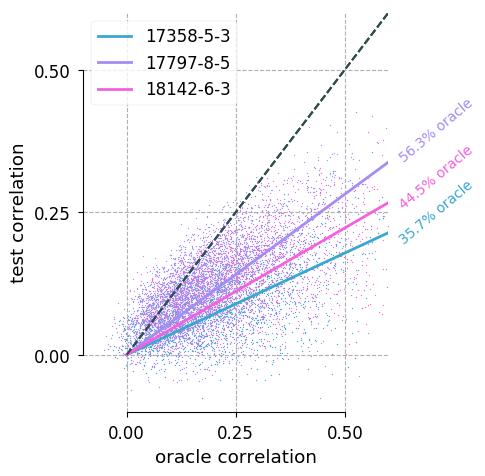

In [22]:
sns.set_context('paper', font_scale=1.5)
sns.set_palette(scan_cmap)
def oracle_regression(x, y, **kwargs):
    x = np.array(x)[:, None]
    y = np.array(y)
    a, _, _, _ = np.linalg.lstsq(x, y)
    ax = plt.gca()
    label = kwargs.pop('label')
    ax.scatter(x, y, **kwargs)
    
    ax.plot([0,.6],[0,a*.6], '-', color=kwargs['color'], lw=2, label= label)
    ax.plot([0,.6],[0,.6], '--', color='darkslategray')
    ax.text(.62, .7 * a, '{:.1f}% oracle'.format(a.item() *100), fontsize=10, va='center', color=kwargs['color'], rotation=40)
    ax.set_xlim([-.1, .6])
    ax.set_ylim([-.1, .6])
    ax.set_xticks([0, .25, .5])
    ax.set_yticks([0, .25, .5])
    ax.grid(True, zorder=-10, linestyle='--')
g = sns.FacetGrid(df, hue='scan', hue_order=scan_order)
g.map(oracle_regression, 'pearson_oracle', 'pearson', s=.5)

g.fig.set_size_inches((5,5))
g.fig.set_dpi(100)
g.set_xlabels('oracle correlation')
g.set_ylabels('test correlation')
g.set_titles('scan {col_name}')
g.ax.legend(ncol=1)    
sns.despine(trim=True)
g.fig.tight_layout()
g.fig.subplots_adjust(right=.8)
g.fig.savefig('figures/percent_oracle_noMod_noShift.png', dpi=200)

In [23]:
def percent_oracle(gr):
    x = np.array(gr.pearson_oracle)[:, None]
    y = np.array(gr.pearson)
    a, _, _, _ = np.linalg.lstsq(x, y)
    return np.round(a * 100, 2)

g = df.groupby('scan')
g.agg(percent_oracle)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


,group_id,seed,animal_id,session,scan_idx,preproc_id,unit_id,pearson,pearson_oracle,spearman
scan,,,,,,,,,,
17358-5-3,35.69,35.69,35.69,35.69,35.69,35.69,35.69,35.69,35.69,35.69
17797-8-5,56.32,56.32,56.32,56.32,56.32,56.32,56.32,56.32,56.32,56.32
18142-6-3,44.47,44.47,44.47,44.47,44.47,44.47,44.47,44.47,44.47,44.47


# Oracle for Linear

## without shifter and modulator

In [24]:
group_ids = [21, 22, 23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))
parameters.ShifterConfig.No()
network_config = dj.AndList([
    {    'core_hash': '7cb8163e1098433a5faca879ef93baed', # 12 x 36
         'mod_hash': 'bafd7322c6e97d25b6299b5d6fe8920b',# No
         'seed': 2606,
         'shift_hash': 'bafd7322c6e97d25b6299b5d6fe8920b', # No
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        },
    'data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    group_constr
])


In [25]:
models.Encoder.TestScores() & network_config

group_id index of group,core_hash unique identifier for configuration,ro_hash unique identifier for configuration,shift_hash unique identifier for configuration,mod_hash unique identifier for configuration,data_hash unique identifier for configuration,train_hash unique identifier for configuration,seed random seed,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,neurons number of neurons,pearson test correlation on single trial responses
21,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.0800977
22,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.0663752
23,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,bafd7322c6e97d25b6299b5d6fe8920b,bafd7322c6e97d25b6299b5d6fe8920b,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,18142,6,3,1,1344,0.0804531


In [26]:
df_oracle = pd.DataFrame( (oracle.MovieOracle.TotalUnitScores() & 'data_hash in ("5253599d3dceed531841271d6eeba9c5")' & group_constr).fetch())
df_network = pd.DataFrame( (models.Encoder.UnitTestScores() & network_config).fetch())
df = df_network.merge(df_oracle, on=['group_id', 'data_hash', 'animal_id', 'session', 'scan_idx', 'preproc_id', 'unit_id'], suffixes=("", "_oracle")).drop([e for e in df_network.columns if 'hash' in e], axis=1)
df['session'] = list(map(str, df['session']))
df['animal_id'] = list(map(str, df['animal_id']))
df['scan_idx'] = list(map(str, df['scan_idx']))
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


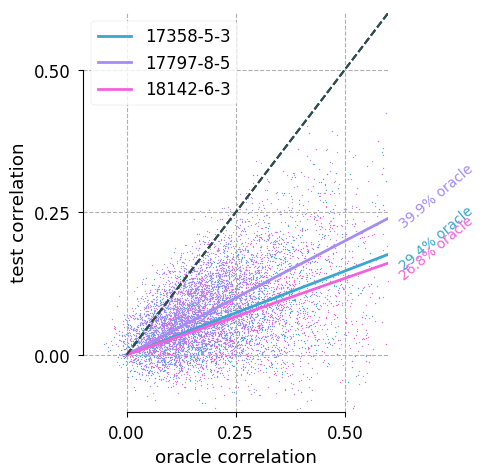

In [27]:
sns.set_context('paper', font_scale=1.5)
sns.set_palette(scan_cmap)
def oracle_regression(x, y, **kwargs):
    x = np.array(x)[:, None]
    y = np.array(y)
    a, _, _, _ = np.linalg.lstsq(x, y)
    ax = plt.gca()
    label = kwargs.pop('label')
    ax.scatter(x, y, **kwargs)
    
    ax.plot([0,.6],[0,a*.6], '-', color=kwargs['color'], lw=2, label= label)
    ax.plot([0,.6],[0,.6], '--', color='darkslategray')
    ax.text(.62, .7 * a, '{:.1f}% oracle'.format(a.item() *100), fontsize=10, va='center', color=kwargs['color'], rotation=40)
    ax.set_xlim([-.1, .6])
    ax.set_ylim([-.1, .6])
    ax.set_xticks([0, .25, .5])
    ax.set_yticks([0, .25, .5])
    ax.grid(True, zorder=-10, linestyle='--')
g = sns.FacetGrid(df, hue='scan', hue_order=scan_order)
g.map(oracle_regression, 'pearson_oracle', 'pearson', s=.5)

g.fig.set_size_inches((5,5))
g.fig.set_dpi(100)
g.set_xlabels('oracle correlation')
g.set_ylabels('test correlation')
g.set_titles('scan {col_name}')
g.ax.legend(ncol=1)    
sns.despine(trim=True)
g.fig.tight_layout()
g.fig.subplots_adjust(right=.8)
g.fig.savefig('figures/percent_oracle_noMod_noShift_Linear.png', dpi=200)

## with shifter and modulator

In [28]:
group_ids = [21, 22, 23]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))

network_config = dj.AndList([
    {    'core_hash': '7cb8163e1098433a5faca879ef93baed', # 12 x 36
         'seed': 2606,
         'mod_hash': '4954311aa3bebb347ebf411ab5198890',
         'shift_hash': '64add03e1462b7413b59812d446aee9f',
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        },
    'data_hash in ("5253599d3dceed531841271d6eeba9c5")',
    group_constr
])
    


In [29]:
models.Encoder.TestScores() & network_config

group_id index of group,core_hash unique identifier for configuration,ro_hash unique identifier for configuration,shift_hash unique identifier for configuration,mod_hash unique identifier for configuration,data_hash unique identifier for configuration,train_hash unique identifier for configuration,seed random seed,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,neurons number of neurons,pearson test correlation on single trial responses
21,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17797,8,5,1,4692,0.116284
22,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,17358,5,3,1,1740,0.0912722
23,7cb8163e1098433a5faca879ef93baed,bf00321c11e46d68d4a42653a725969d,64add03e1462b7413b59812d446aee9f,4954311aa3bebb347ebf411ab5198890,5253599d3dceed531841271d6eeba9c5,624f62a2ef01d39f6703f3491bb9242b,2606,18142,6,3,1,1344,0.126663


In [30]:
df_oracle = pd.DataFrame( (oracle.MovieOracle.TotalUnitScores() & 'data_hash in ("5253599d3dceed531841271d6eeba9c5")' & group_constr).fetch())
df_network = pd.DataFrame( (models.Encoder.UnitTestScores() & network_config).fetch())
df = df_network.merge(df_oracle, on=['group_id', 'data_hash', 'animal_id', 'session', 'scan_idx', 'preproc_id', 'unit_id'], suffixes=("", "_oracle")).drop([e for e in df_network.columns if 'hash' in e], axis=1)
df['session'] = list(map(str, df['session']))
df['animal_id'] = list(map(str, df['animal_id']))
df['scan_idx'] = list(map(str, df['scan_idx']))
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


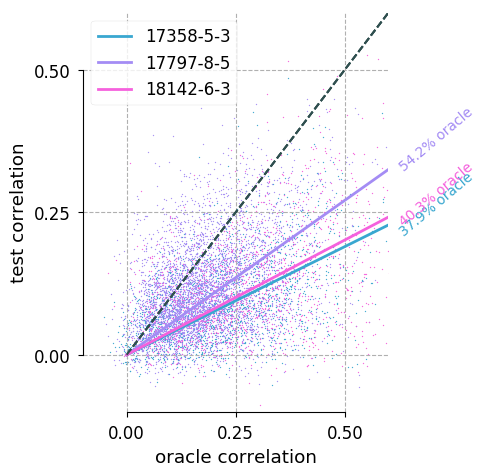

In [31]:
sns.set_context('paper', font_scale=1.5)
sns.set_palette(scan_cmap)
def oracle_regression(x, y, **kwargs):
    x = np.array(x)[:, None]
    y = np.array(y)
    a, _, _, _ = np.linalg.lstsq(x, y)
    ax = plt.gca()
    label = kwargs.pop('label')
    ax.scatter(x, y, **kwargs)
    
    ax.plot([0,.6],[0,a*.6], '-', color=kwargs['color'], lw=2, label= label)
    ax.plot([0,.6],[0,.6], '--', color='darkslategray')
    ax.text(.62, .7 * a, '{:.1f}% oracle'.format(a.item() *100), fontsize=10, va='center', color=kwargs['color'], rotation=40)
    ax.set_xlim([-.1, .6])
    ax.set_ylim([-.1, .6])
    ax.set_xticks([0, .25, .5])
    ax.set_yticks([0, .25, .5])
    ax.grid(True, zorder=-10, linestyle='--')
g = sns.FacetGrid(df, hue='scan', hue_order=scan_order)
g.map(oracle_regression, 'pearson_oracle', 'pearson', s=.5)

g.fig.set_size_inches((5,5))
g.fig.set_dpi(100)
g.set_xlabels('oracle correlation')
g.set_ylabels('test correlation')
g.set_titles('scan {col_name}')
g.ax.legend(ncol=1)    
sns.despine(trim=True)
g.fig.tight_layout()
g.fig.subplots_adjust(right=.8)
g.fig.savefig('figures/percent_oracle__Linear.png', dpi=200)

# Cross Performance

In [32]:
group_ids = [21,22, 17, 20]
group_constr = 'group_id in ({})'.format(','.join(tuple(map(str, group_ids))))
network_config = {
         'core_hash': '22d11147b37e3947e7d1034cc00d402c', # 12 x 36
         'mod_hash': '4954311aa3bebb347ebf411ab5198890',
         'seed': 2606,
         'shift_hash': '64add03e1462b7413b59812d446aee9f',
         'train_hash': '624f62a2ef01d39f6703f3491bb9242b', # batchsize=8 stop gradient
         'ro_hash':'bf00321c11e46d68d4a42653a725969d', # 2 and 4 
        }
network_config = dj.AndList([
    network_config,
    'data_hash in ("a4ecafc831670c7744ffe22320df77b7", "76a76dbc0216d8b10a079957ea24e3ad")'
])

        

In [33]:
performance.XPearson().populate(network_config, group_constr)

In [34]:
rel = performance.XPearson.UnitScores() & network_config & group_constr
df = pd.DataFrame(rel.fetch())
df['core train data'] = [core_train(r) for _, r in df.iterrows()]
df['readout train data'] = [readout_train(r) for _, r in df.iterrows()]
df['test data'] = [test_label(r) for _, r in df.iterrows()]
df['scan'] = ['{animal_id}-{session}-{scan_idx}'.format(**r.to_dict()) for _, r in df.iterrows()]
# df['train type'] = [train_type(r) for _, r in df.iterrows()]

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


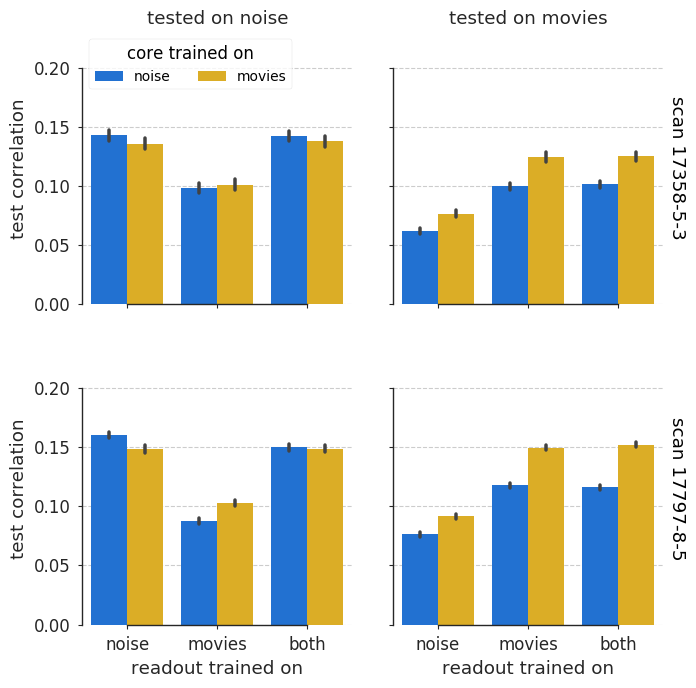

In [35]:
my_pal = sns.xkcd_palette(['cerulean blue', 'golden rod'])
sns.set_palette(my_pal)
hue_order = ['noise', 'both', 'movies']
with sns.axes_style("ticks"):
    g = sns.factorplot("readout train data", "pearson", hue='core train data', row="scan", col='test data', 
                       data=df, kind="bar", hue_order=['noise', 'movies'], 
                       order=['noise', 'movies', 'both'], col_order=['noise', 'movies'], row_order=['17358-5-3', '17797-8-5'],
                       legend=False, margin_titles=False)
g._margin_titles = True
g.fig.set_dpi(100)
g.set_titles(row_template="scan {row_name}", col_template="tested on {col_name}")
g.set_ylabels("test correlation")

for a in g.axes.ravel():
    a.set_yticks(performance_yticks)
    a.set_ylim(performance_ylim)
    a.yaxis.grid(linestyle='--', zorder=-100)
    fix_axis(a)
g.set_xlabels('readout trained on')
for a in g.axes[1]:
    a.set_title('')
    
leg = g.axes[0,0].legend(title='core trained on', prop={'size':10}, loc='upper left', ncol=2)
plt.setp(leg.get_title(),fontsize='small')

g.set_ylabels('test correlation')
sns.despine(trim=True)
g.fig.set_size_inches((7,7))

g.fig.savefig('figures/Xperformance.png', dpi=200)

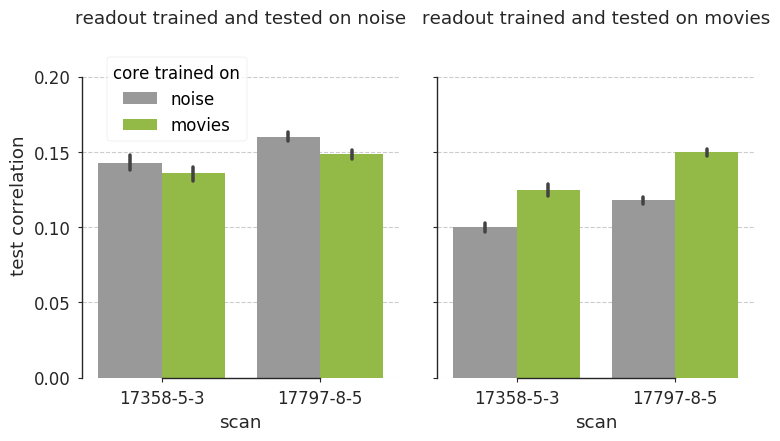

In [36]:
sns.set_context('paper', font_scale=1.5)
my_pal = ['#999999', '#99CC33']
df2 = pd.DataFrame(df)
df2 = df[df2['test data'] == df2['readout train data']]
sns.set_palette(my_pal)
with sns.axes_style("ticks"):
    g = sns.factorplot("scan", "pearson", hue='core train data', col='test data', 
                       data=df2, kind="bar", 
                       col_order=['noise', 'movies'], hue_order=['noise', 'movies'], order=['17358-5-3', '17797-8-5'],
                       legend=False, margin_titles=False)
    
g.fig.set_dpi(100)
g.set_titles("readout trained and tested on {col_name}")
g.set_ylabels("test correlation")

for a in g.axes.ravel():
    a.set_yticks(performance_yticks)
    a.set_ylim(performance_ylim)
    a.yaxis.grid(linestyle='--', zorder=-100)
    fix_axis(a)
    
leg = g.axes[0,0].legend(title='core trained on', prop={'size':12}, loc='upper left', ncol=1, bbox_to_anchor=(.05, .95))
plt.setp(leg.get_title(),fontsize='small')

sns.despine(trim=True)
g.fig.set_figheight(5)

g.fig.savefig('figures/movie_as_good_as_dedicated.png', dpi=200)